### Deskripsi Masalah
Banyaknya daerah rawan banjir, terutama di wilayah di DKI Jakarta perlu menjadi perhatian. Khususnya 
bagi warga DKI Jakarta yang ingin tinggal di suatu daerah, dengan nyaman tanpa adanya bencana banjir. 
Berdasarkan survey Badan Penanggulangan Bencana Daerah (BPBD) DKI Jakarta tahun 2020 terdapat 82 
kelurahan yang berpotensi banjir berdasarkan hasil analisis data historis banjir dengan kondisi fisik alam 
wilayah DKI Jakarta. Dikarenakan masalah diatas kami membuat sebuah model machine learning untuk 
mendeteksi tempat rawan banjir di daerah DKI Jakarta melalui data-data historis untuk membantu 
masyarakat DKI Jakarta dalam mengurangi resiko terkena bencana banjir.
### Sumber Data
Untuk pembuatan machine learning ini kami mengambil dataset Data Kejadian Bencana Banjir di 
Provinsi DKI Jakarta Tahun 2019,2020 sebagai dataset kami. Data ini kami dapatkan melalui website 
open data data.jakarta.go.id .

Penjelasan mengenai variabel pada dataset ini :
1. kota_administrasi : nama kota di Provinsi DKI Jakarta yang terkena dampak banjir
2. kecamatan : nama kecamatan yang terkena dampak banjir
3. kelurahan : nama kelurahan yang terkena dampak banjir
4. rw : nama RW yang terkena dampak banjir
5. jumlah_terdampak_rw : jumlah RW yang terkena dampak banjir
6. jumlah_terdampak_rt : jumlah RT yang terkena dampak banjir
7. jumlah_terdampak_kk : jumlah kepala keluarga yang terkena dampak banjir
8. jumlah_terdampak_jiwa : jumlah orang yang terkena dampak banjir
9. ketinggian_air : ketinggian air pada saat kejadian banjir (cm)
10. tanggal_kejadian : tanggal kejadian banjir
11. lama_genangan : lama genangan saat banjir (hari)
12. jumlah_meninggal : jumlah korban meninggal saat kejadian banjir
13. jumlah_hilang : jumlah korban hilang saat kejadian banjir
14. jumlah_luka_berat : jumlah korban luka berat saat kejadian banjir
15. jumlah_luka_ringan : jumlah korban luka ringan saat kejadian banjir
16. jumlah_pengungsi_tertinggi : jumlah pengungsi banjir
17. jumlah_tempat_pengungsian : jumlah tempat pengungsian korban banjir
18. nilai_kerugian : jumlah nilai kerugian akibat kejadian banjir

#Telaah Data

In [ ]:
#import library
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load dataset
df=pd.read_csv('/content/DatasetBanjir - banjirjakarta1920.csv')
df.head()

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,rata_rata_ketinggian_air,tanggal_kejadian,frekuensi_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian
0,Jakarta Pusat,JOHAR BARU,JOHAR BARU,"rw 05, 09,",2,2,0.0,0,40,"23, 25 februari",2,0,0,0,0,0,0,0,0
1,Jakarta Pusat,JOHAR BARU,KAMPUNG RAWA,rw 06,1,2,0.0,0,20,23 februari,1,0,0,0,0,0,0,0,0
2,Jakarta Pusat,JOHAR BARU,TANAH TINGGI,rw 05,1,1,0.0,0,30,23 februari,1,0,0,0,0,0,0,0,0
3,Jakarta Pusat,KEMAYORAN,GUNUNG SAHARI SELATAN,"rw 04, 09,",2,2,0.0,0,60,"2, 8, 23 februari",3,0,0,0,0,0,0,0,0
4,Jakarta Pusat,KEMAYORAN,SERDANG,"rw 06, 01",2,2,0.0,0,30,23 februari,1,0,0,0,0,0,0,0,0



- Mengetahui tipe data dari setiap kolom
- Mengetahui statistik dasar dari dataset

In [ ]:
# Menampilkan tipe data dari setiap Kolom
df.dtypes

kota_administrasi              object
kecamatan                      object
kelurahan                      object
rw                             object
jumlah_terdampak_rw             int64
jumlah_terdampak_rt             int64
jumlah_terdampak_kk           float64
jumlah_terdampak_jiwa           int64
rata_rata_ketinggian_air        int64
tanggal_kejadian               object
frekuensi_kejadian              int64
lama_genangan                   int64
jumlah_meninggal                int64
jumlah_hilang                   int64
jumlah_luka_berat               int64
jumlah_luka_ringan              int64
jumlah_pengungsi_tertinggi      int64
jumlah_tempat_pengungsian       int64
nilai_kerugian                  int64
dtype: object

In [ ]:
# deskripsi statistik data
df.describe()

,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,rata_rata_ketinggian_air,frekuensi_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian
count,1089.000000,1089.000000,1088.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.0,1089.0,1089.0,1089.000000,1089.000000,1089.000000,1089.0
mean,2.067952,3.989899,43.221507,152.363636,41.960514,1.684114,0.019284,0.0,0.0,0.0,86.261708,1.246097,0.011019,0.0
std,2.329670,6.036568,195.737300,670.113326,28.538244,1.182491,0.150352,0.0,0.0,0.0,348.987636,10.229537,0.135133,0.0
min,0.000000,1.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
25%,1.000000,1.000000,0.000000,0.000000,20.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
50%,1.000000,1.000000,0.000000,0.000000,35.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
75%,3.000000,4.000000,5.000000,19.000000,50.000000,2.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
max,15.000000,51.000000,3762.000000,13450.000000,221.000000,10.000000,2.000000,0.0,0.0,0.0,4461.000000,271.000000,3.000000,0.0


In [ ]:
#melihat bentuk ukuran dataset
df.shape

(1089, 19)

In [ ]:
#menjumlahkan
df.sum()

kota_administrasi             Jakarta PusatJakarta PusatJakarta PusatJakarta...
kecamatan                     JOHAR BARUJOHAR BARUJOHAR BARUKEMAYORANKEMAYOR...
kelurahan                     JOHAR BARUKAMPUNG RAWATANAH TINGGIGUNUNG SAHAR...
rw                            rw 05, 09, rw 06rw 05rw 04, 09, rw 06, 01rw 05...
jumlah_terdampak_rw                                                        2252
jumlah_terdampak_rt                                                        4345
jumlah_terdampak_kk                                                       47025
jumlah_terdampak_jiwa                                                    165924
rata_rata_ketinggian_air                                                  45695
tanggal_kejadian              23, 25  februari23 februari23 februari2, 8, 23...
frekuensi_kejadian                                                         1834
lama_genangan                                                                21
jumlah_meninggal                        

In [ ]:
#memisahkan data
df_noid = df.iloc[:,0:11]
df_noid

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,rata_rata_ketinggian_air,tanggal_kejadian,frekuensi_kejadian
0,Jakarta Pusat,JOHAR BARU,JOHAR BARU,"rw 05, 09,",2,2,0.0,0,40,"23, 25 februari",2
1,Jakarta Pusat,JOHAR BARU,KAMPUNG RAWA,rw 06,1,2,0.0,0,20,23 februari,1
2,Jakarta Pusat,JOHAR BARU,TANAH TINGGI,rw 05,1,1,0.0,0,30,23 februari,1
3,Jakarta Pusat,KEMAYORAN,GUNUNG SAHARI SELATAN,"rw 04, 09,",2,2,0.0,0,60,"2, 8, 23 februari",3
4,Jakarta Pusat,KEMAYORAN,SERDANG,"rw 06, 01",2,2,0.0,0,30,23 februari,1
...,...,...,...,...,...,...,...,...,...,...,...
1084,Jakarta Timur,KEC. MAKASAR,KEL. KEBON PALA,"06, 04, 05",3,3,0.0,0,40,"tgl. 23, 27",2
1085,Jakarta Timur,KEC. KRAMAT JATI,KEL. BATU AMPAR,4,1,1,0.0,0,40,"tgl 27,",1
1086,Jakarta Timur,KEC. KRAMAT JATI,KEL. CAWANG,3,1,2,0.0,0,50,"tgl 27,",1
1087,Jakarta Timur,KEC. JATINEGARA,KEL. KAMPUNG MELAYU,"04, 05, 07, 08,",4,25,106.0,337,30,"tgl 27, 31",2


In [ ]:
df_noid.describe()

,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,rata_rata_ketinggian_air,frekuensi_kejadian
count,1089.000000,1089.000000,1088.000000,1089.000000,1089.000000,1089.000000
mean,2.067952,3.989899,43.221507,152.363636,41.960514,1.684114
std,2.329670,6.036568,195.737300,670.113326,28.538244,1.182491
min,0.000000,1.000000,0.000000,0.000000,5.000000,1.000000
25%,1.000000,1.000000,0.000000,0.000000,20.000000,1.000000
50%,1.000000,1.000000,0.000000,0.000000,35.000000,1.000000
75%,3.000000,4.000000,5.000000,19.000000,50.000000,2.000000
max,15.000000,51.000000,3762.000000,13450.000000,221.000000,10.000000


### Mencari (outlier) pencilan dengan Tukey's fences 

In [ ]:
# Mencari Pencilan (Outlier) dengan Tukey's fences
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
iqr

jumlah_terdampak_rw            2.0
jumlah_terdampak_rt            3.0
jumlah_terdampak_kk            5.0
jumlah_terdampak_jiwa         19.0
rata_rata_ketinggian_air      30.0
frekuensi_kejadian             1.0
lama_genangan                  0.0
jumlah_meninggal               0.0
jumlah_hilang                  0.0
jumlah_luka_berat              0.0
jumlah_luka_ringan             0.0
jumlah_pengungsi_tertinggi     0.0
jumlah_tempat_pengungsian      0.0
nilai_kerugian                 0.0
dtype: float64

In [ ]:
df_noid_align, iqr_new = df_noid.align(iqr, axis=1, copy=False, join='outer')
outlier_filter = (df_noid < q1 - 1.5 * iqr_new) | (df_noid > q3 + 1.5 * iqr_new)
outlier_filter

,frekuensi_kejadian,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_meninggal,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,jumlah_terdampak_jiwa,jumlah_terdampak_kk,jumlah_terdampak_rt,jumlah_terdampak_rw,kecamatan,kelurahan,kota_administrasi,lama_genangan,nilai_kerugian,rata_rata_ketinggian_air,rw,tanggal_kejadian
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1085,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1086,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1087,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False


In [ ]:
df_outlier_filter = df_noid[outlier_filter['rata_rata_ketinggian_air']].loc[:,['kecamatan','rata_rata_ketinggian_air']].sort_values(by=['rata_rata_ketinggian_air'],ascending=False)
df_outlier_filter

,kecamatan,rata_rata_ketinggian_air
260,PESANGGRAHAN,221
262,PESANGGRAHAN,221
261,PESANGGRAHAN,221
96,PANCORAN,200
294,JATINEGARA,180
...,...,...
575,PASAR MINGGU,100
503,KEBON JERUK,100
399,KRAMAT JATI,100
388,PASAR MINGGU,100


In [ ]:
df['kecamatan'].value_counts()

JATINEGARA               84
KRAMAT JATI              74
PASAR MINGGU             55
KEBON JERUK              48
CIRACAS                  44
                         ..
KEC. MAMPANG PRAPATAN     1
PULO GADUNG               1
GAMBIR                    1
KEC. PADEMANGAN           1
KEC. MAMPANG              1
Name: kecamatan, Length: 80, dtype: int64

In [ ]:
df['kecamatan'].unique()

array(['JOHAR BARU', 'KEMAYORAN', 'SAWAH BESAR', 'TANAH ABANG', 'SENEN',
       'MENTENG', 'CEMPAKA PUTIH', 'GAMBIR', 'TANJUNG PRIOK',
       'KELAPA GADING', 'KOJA', 'PENJARINGAN', 'PADEMANGAN', 'CILIINCING',
       'CENGKARENG', 'GROGOL PETAMBURAN', 'KALIDERES', 'KEBON JERUK',
       'KEMBANGAN', 'PALMERAH', 'TAMAN SARI', 'TAMBORA', 'CILANDAK',
       'JAGAKARSA', 'KEBAYORAN BARU', 'KEBAYORAN LAMA',
       'MAMPANG PRAPATAN', 'PANCORAN', 'PASAR MINGGU', 'PESANGGRAHAN',
       'SETIABUDI', 'TEBET', 'CAKUNG', 'CIPAYUNG', 'CIRACAS',
       'DUREN SAWIT', 'JATINEGARA', 'KRAMAT JATI', 'MAKASAR', 'MATRAMAN',
       'PASAR REBO', 'PULOGADUNG', 'CILINCING',
       'KEPULAUAN SERIBU SELATAN', 'KEPULAUAN SERIBU UTARA', 'MAMPANG',
       'PULO GADUNG', 'KEC. PENJARINGAN', 'KEC. KEMBANGAN',
       'KEC. KALIDERES', 'KEC. KEBAYORAN LAMA', 'KEC, PASAR MINGGU',
       'KEC. PANCORAN', 'KEC. TEBET', 'KEC. KEBAYORAN BARU',
       'KEC. MAMPANG', 'KEC. JAGAKARSA', 'KEC. CILANDAK', 'KEC. MAKASAR',
    

In [ ]:
# Mengelompokkan rata-rata ketinggian air berdasarkan KECAMATAN
df.groupby('kecamatan')['rata_rata_ketinggian_air'].mean()

kecamatan
CAKUNG           45.722222
CEMPAKA PUTIH    23.750000
CENGKARENG       28.641026
CILANDAK         50.526316
CILIINCING       38.000000
                   ...    
TAMAN SARI       30.000000
TAMBORA          35.000000
TANAH ABANG      48.666667
TANJUNG PRIOK    23.333333
TEBET            48.800000
Name: rata_rata_ketinggian_air, Length: 80, dtype: float64

In [ ]:
#Melihat korelasi antar KOLOM
df.loc[:,'jumlah_terdampak_rw':'lama_genangan'].corr()

,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,rata_rata_ketinggian_air,frekuensi_kejadian,lama_genangan
jumlah_terdampak_rw,1.000000,0.717267,0.391584,0.399439,0.268554,0.256361,0.200929
jumlah_terdampak_rt,0.717267,1.000000,0.428910,0.417705,0.231259,0.317591,0.132876
jumlah_terdampak_kk,0.391584,0.428910,1.000000,0.987936,0.253538,0.216636,0.126244
jumlah_terdampak_jiwa,0.399439,0.417705,0.987936,1.000000,0.266261,0.209956,0.137187
rata_rata_ketinggian_air,0.268554,0.231259,0.253538,0.266261,1.000000,0.164028,0.167474
frekuensi_kejadian,0.256361,0.317591,0.216636,0.209956,0.164028,1.000000,0.070481
lama_genangan,0.200929,0.132876,0.126244,0.137187,0.167474,0.070481,1.000000


# Data Prepration

In [ ]:
# Mengecek nilai NaN
df.isna().sum()

kota_administrasi             0
kecamatan                     0
kelurahan                     0
rw                            0
jumlah_terdampak_rw           0
jumlah_terdampak_rt           0
jumlah_terdampak_kk           1
jumlah_terdampak_jiwa         0
rata_rata_ketinggian_air      0
tanggal_kejadian              0
frekuensi_kejadian            0
lama_genangan                 0
jumlah_meninggal              0
jumlah_hilang                 0
jumlah_luka_berat             0
jumlah_luka_ringan            0
jumlah_pengungsi_tertinggi    0
jumlah_tempat_pengungsian     0
nilai_kerugian                0
dtype: int64

In [ ]:
# Mengisi nilai NaN dengan 0
df.fillna(0,inplace=True)

In [ ]:
# Mengecek kembali nilai NaN
df.isna().sum()

kota_administrasi             0
kecamatan                     0
kelurahan                     0
rw                            0
jumlah_terdampak_rw           0
jumlah_terdampak_rt           0
jumlah_terdampak_kk           0
jumlah_terdampak_jiwa         0
rata_rata_ketinggian_air      0
tanggal_kejadian              0
frekuensi_kejadian            0
lama_genangan                 0
jumlah_meninggal              0
jumlah_hilang                 0
jumlah_luka_berat             0
jumlah_luka_ringan            0
jumlah_pengungsi_tertinggi    0
jumlah_tempat_pengungsian     0
nilai_kerugian                0
dtype: int64

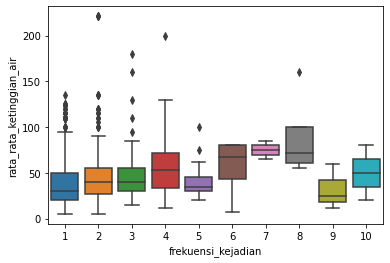

In [ ]:
#melihat outlier (pencilan)
sns.boxplot(x="frekuensi_kejadian", y="rata_rata_ketinggian_air", data=df_noid)

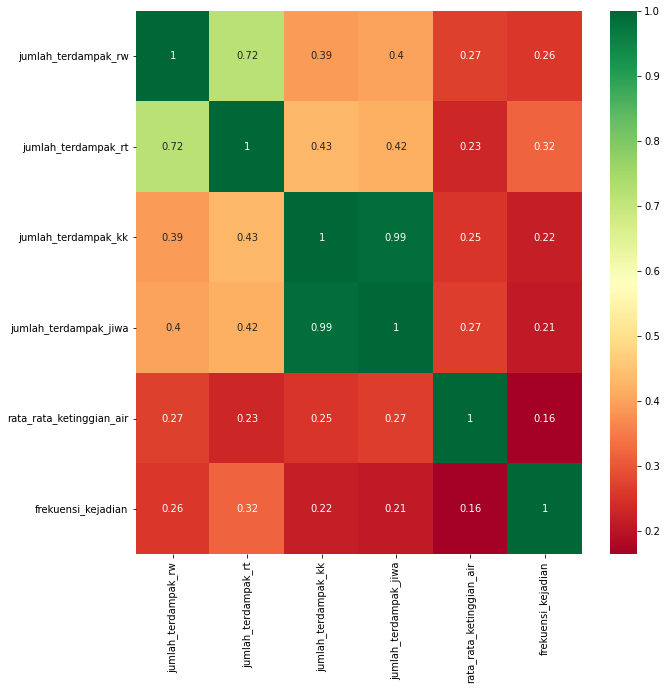

In [ ]:
# melihat korelasi menggunakan heatmap
plt.figure(figsize=(10,10))
g=sns.heatmap(df_noid.corr(),annot=True,cmap="RdYlGn")

### DATA CLEANING

In [ ]:
df

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,rata_rata_ketinggian_air,tanggal_kejadian,frekuensi_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian
0,Jakarta Pusat,JOHAR BARU,JOHAR BARU,"rw 05, 09,",2,2,0.0,0,40,"23, 25 februari",2,0,0,0,0,0,0,0,0
1,Jakarta Pusat,JOHAR BARU,KAMPUNG RAWA,rw 06,1,2,0.0,0,20,23 februari,1,0,0,0,0,0,0,0,0
2,Jakarta Pusat,JOHAR BARU,TANAH TINGGI,rw 05,1,1,0.0,0,30,23 februari,1,0,0,0,0,0,0,0,0
3,Jakarta Pusat,KEMAYORAN,GUNUNG SAHARI SELATAN,"rw 04, 09,",2,2,0.0,0,60,"2, 8, 23 februari",3,0,0,0,0,0,0,0,0
4,Jakarta Pusat,KEMAYORAN,SERDANG,"rw 06, 01",2,2,0.0,0,30,23 februari,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,Jakarta Timur,KEC. MAKASAR,KEL. KEBON PALA,"06, 04, 05",3,3,0.0,0,40,"tgl. 23, 27",2,0,0,0,0,0,0,0,0
1085,Jakarta Timur,KEC. KRAMAT JATI,KEL. BATU AMPAR,4,1,1,0.0,0,40,"tgl 27,",1,0,0,0,0,0,0,0,0
1086,Jakarta Timur,KEC. KRAMAT JATI,KEL. CAWANG,3,1,2,0.0,0,50,"tgl 27,",1,0,0,0,0,0,0,0,0
1087,Jakarta Timur,KEC. JATINEGARA,KEL. KAMPUNG MELAYU,"04, 05, 07, 08,",4,25,106.0,337,30,"tgl 27, 31",2,0,0,0,0,0,0,0,0


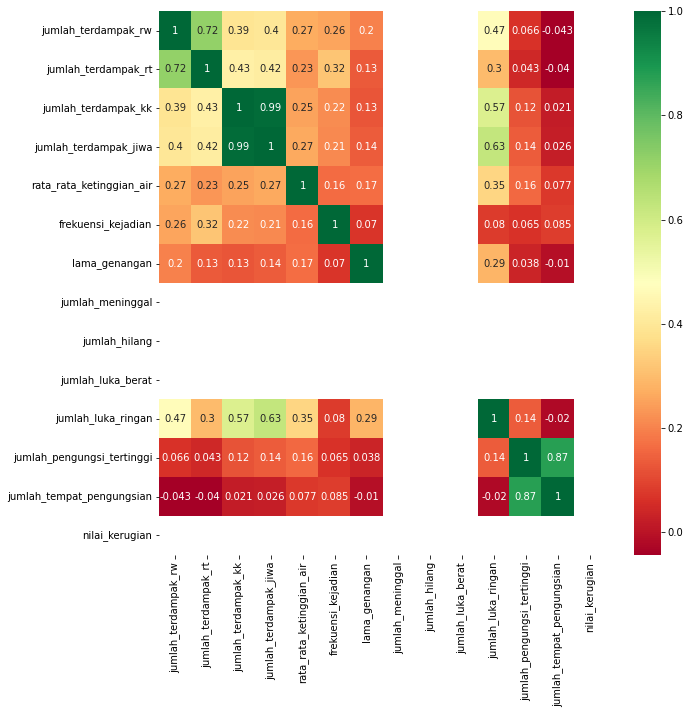

In [ ]:
# mengecek data dengan heatmap
plt.figure(figsize=(10,10))
g=sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

Pada feature yang berwarna putih (kosong), berarti feature tersebut memiliki nilai NaN

In [ ]:
to_drop = ['jumlah_meninggal','jumlah_hilang','jumlah_luka_berat','nilai_kerugian']

In [ ]:
df.drop(columns=to_drop, inplace=True)

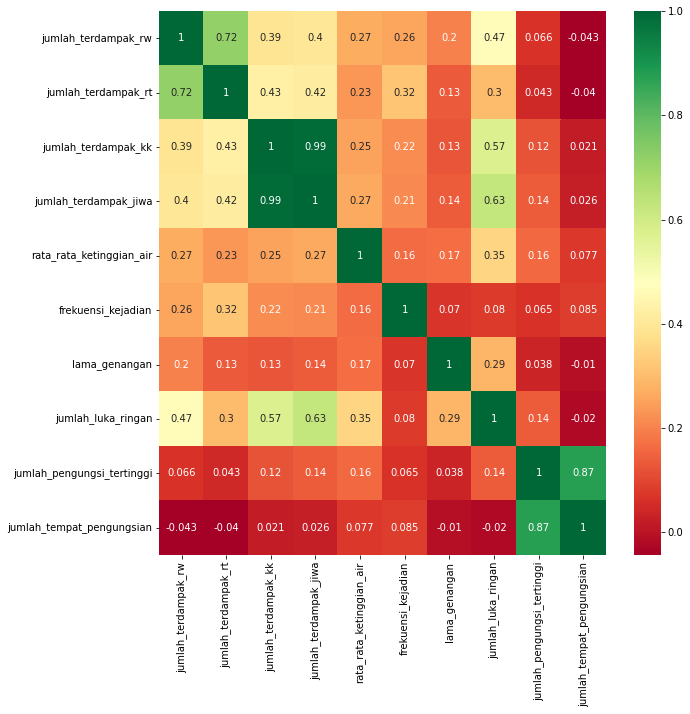

In [ ]:
# mengecek kembali data yang telah dihapus menggunakan heatmap
plt.figure(figsize=(10,10))
g=sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

Menghapus feature yang bernilai NaN

# Pembuatan MODEL
Kategori banjir berdasarkan frekuensi kejadian : 
1. Ringan 1-3
2. Sedang 4-7
3. Berat 8-10

In [ ]:
#df.drop(columns="KategoriBanjir")

In [ ]:
category = pd.cut(df.frekuensi_kejadian,bins=[0,3,7,11],labels=['Ringan','Sedang','Berat'])
df.insert(11,'KategoriBanjir',category)

In [ ]:
df['KategoriBanjir'].unique()

['Ringan', 'Sedang', 'Berat']
Categories (3, object): ['Ringan' < 'Sedang' < 'Berat']

In [ ]:
df.head(20)

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,rata_rata_ketinggian_air,tanggal_kejadian,frekuensi_kejadian,KategoriBanjir,lama_genangan,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian
0,Jakarta Pusat,JOHAR BARU,JOHAR BARU,"rw 05, 09,",2,2,0.0,0,40,"23, 25 februari",2,Ringan,0,0,0,0
1,Jakarta Pusat,JOHAR BARU,KAMPUNG RAWA,rw 06,1,2,0.0,0,20,23 februari,1,Ringan,0,0,0,0
2,Jakarta Pusat,JOHAR BARU,TANAH TINGGI,rw 05,1,1,0.0,0,30,23 februari,1,Ringan,0,0,0,0
3,Jakarta Pusat,KEMAYORAN,GUNUNG SAHARI SELATAN,"rw 04, 09,",2,2,0.0,0,60,"2, 8, 23 februari",3,Ringan,0,0,0,0
4,Jakarta Pusat,KEMAYORAN,SERDANG,"rw 06, 01",2,2,0.0,0,30,23 februari,1,Ringan,0,0,0,0
5,Jakarta Pusat,KEMAYORAN,CEMPAKA BARU,"rw 05, 07",2,7,0.0,0,35,"23, 25 februari",2,Ringan,0,0,0,0
6,Jakarta Pusat,KEMAYORAN,KEMAYORAN,rw 08,1,1,0.0,0,20,23 februari,1,Ringan,0,0,0,0
7,Jakarta Pusat,KEMAYORAN,KEBON KOSONG,"rw 01, 02, 03, 04, 05, 06, 07, 08, 09, 12",10,10,0.0,0,30,25 februari,1,Ringan,0,0,0,0
8,Jakarta Pusat,KEMAYORAN,SUMUR BATU,rw 07,1,1,0.0,0,30,25 februari,1,Ringan,0,0,0,0
9,Jakarta Pusat,SAWAH BESAR,PASAR BARU,"rw 03, 04, 05, 06",4,6,0.0,0,25,"8, 21, 22, 23 februari",4,Sedang,0,450,1,0


#MODELLING


Import library untuk kebutuhan model



In [ ]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report

# Import libarary confusion matrix
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.model_selection import train_test_split

# Import libarary Logistic Regression
from sklearn.linear_model import LogisticRegression

from sklearn import linear_model
from sklearn.linear_model import SGDClassifier

# Import libarary KNN
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis

# Import libarary Support Vector Machines dan linier Support Vector Machines
from sklearn import svm
from sklearn.svm import LinearSVC

# Import libarary Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

##Splitting Dataset

In [ ]:
X=df[['rata_rata_ketinggian_air', 'jumlah_terdampak_kk', 'frekuensi_kejadian']]
y=df['KategoriBanjir']

In [ ]:
#Train and Test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

### 1. Logistic Regression:

In [ ]:
logreg = LogisticRegression(solver= 'lbfgs',max_iter=400)
logreg.fit(X_train.values, y_train.values)
Y_pred = logreg.predict(X_test.values)
accuracy_lr=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)


cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Logistic Regression\n',cm)
print('accuracy_Logistic Regression : %.3f' %accuracy)
print('precision_Logistic Regression : %.3f' %precision)
print('recall_Logistic Regression: %.3f' %recall)
print('f1-score_Logistic Regression : %.3f' %f1)

Confusion matrix for Logistic Regression
 [[  3   0   0]
 [  0 308   0]
 [  0   0  16]]
accuracy_Logistic Regression : 1.000
precision_Logistic Regression : 1.000
recall_Logistic Regression: 1.000
f1-score_Logistic Regression : 1.000


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


### 2.KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train.values, y_train.values)
Y_pred = knn.predict(X_test.values) 
accuracy_knn=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall = recall_score(y_test, Y_pred,average='micro')
f1 =f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for KNN\n',cm)
print('accuracy_KNN : %.3f' %accuracy)
print('precision_KNN : %.3f' %precision)
print('recall_KNN: %.3f' %recall)
print('f1-score_KNN : %.3f' %f1)

Confusion matrix for KNN
 [[  0   0   3]
 [  1 306   1]
 [  1  12   3]]
accuracy_KNN : 0.945
precision_KNN : 0.945
recall_KNN: 0.945
f1-score_KNN : 0.945


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


### 3.Gaussian Naive Bayes

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train.values, y_train.values)
Y_pred = gaussian.predict(X_test.values) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 =f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[  3   0   0]
 [  0 305   3]
 [  1   0  15]]
accuracy_Naive Bayes: 0.988
precision_Naive Bayes: 0.988
recall_Naive Bayes: 0.988
f1-score_Naive Bayes : 0.988


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


### 4. Support Vector Machine

In [ ]:
linear_svc = LinearSVC(max_iter=4000)
linear_svc.fit(X_train.values, y_train.values)
Y_pred = linear_svc.predict(X_test.values)
accuracy_svc=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for SVC\n',cm)
print('accuracy_SVC: %.3f' %accuracy)
print('precision_SVC: %.3f' %precision)
print('recall_SVC: %.3f' %recall)
print('f1-score_SVC : %.3f' %f1)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Confusion matrix for SVC
 [[  0   0   3]
 [  0 308   0]
 [  0   0  16]]
accuracy_SVC: 0.991
precision_SVC: 0.991
recall_SVC: 0.991
f1-score_SVC : 0.991


In [ ]:
print('Klasifikasi dengan KNN rata_rata_ketinggian_air, jumlah_terdampak_kk, frekuensi_kejadian :',knn.predict([[25,0,4]]))
print('Klasifikasi dengan Gaussian Naive Baiyes rata_rata_ketinggian_air, jumlah_terdampak_kk, frekuensi_kejadian :',gaussian.predict([[25,0,4]]))
print('Klasifikasi dengan SVM rata_rata_ketinggian_air, jumlah_terdampak_kk, frekuensi_kejadian :',linear_svc.predict([[25,0,4]]))

Klasifikasi dengan KNN rata_rata_ketinggian_air, jumlah_terdampak_kk, frekuensi_kejadian : ['Sedang']
Klasifikasi dengan Gaussian Naive Baiyes rata_rata_ketinggian_air, jumlah_terdampak_kk, frekuensi_kejadian : ['Sedang']
Klasifikasi dengan SVM rata_rata_ketinggian_air, jumlah_terdampak_kk, frekuensi_kejadian : ['Sedang']


In [ ]:
import pickle
pickle.dump(gaussian, open('model.pkl','wb'))

model = pickle.load(open('model.pkl','rb'))
print(model.predict([[4, 300, 500]]))

['Berat']
